In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from pathlib import Path
import numpy as np


In [3]:
#Import csv file to be analyzed airline_passenger_satisfaction
# Goals: which percentage of airline passengers are satisfied? Does it vary

airline_pass_data = Path("Resources/airline_passenger_satisfaction.csv")

airline_data = pd.read_csv(airline_pass_data)
airline_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
#Replace all 0's in columns with null values so they are not counted
#for comfortable calculations let's replace all "0" in DF with NaN, so it would be ignored in calculations 
# Create a copy of the original DataFrame
survey_columns = [
    "Departure and Arrival Time Convenience", "Ease of Online Booking", "Check-in Service", 
    "Online Boarding", "Gate Location", "On-board Service", "Seat Comfort", "Leg Room Service",
    "Cleanliness", "Food and Drink", "In-flight Service", "In-flight Wifi Service", 
    "In-flight Entertainment", "Baggage Handling"
]

# Create a copy of the original DataFrame
airline_data_cleaned = airline_data.copy()

# Replace 0 with NaN in the specified survey columns
airline_data_cleaned[survey_columns] = airline_data_cleaned[survey_columns].replace(0, np.nan)

In [5]:
# Total passengers in database

total_passengers = airline_data['ID'].count()
total_passengers

129880

In [6]:
# total number of passengers with satisfied reviews
satisfied_pass = airline_data[(airline_data['Satisfaction'] == 'Satisfied') & (airline_data['Satisfaction'] != 0)]
total_passengers = len(airline_data)
satisfied_count = len(satisfied_pass)
satisfied_percentage = (satisfied_count / total_passengers) * 100

satisfied_percentage


43.44625808438558

In [7]:
### get the number of 'Neutral or Dissatisfied' reviews
disatisfied_pass = airline_data[airline_data['Satisfaction'] == 'Neutral or Dissatisfied']
disatisfied_count = len(disatisfied_pass)
disatisfied_percentage = (disatisfied_count / total_passengers) * 100

disatisfied_percentage

56.55374191561441

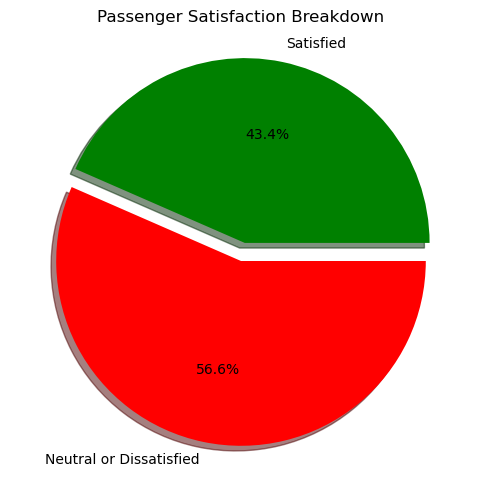

In [8]:
# Pie chart for satisfaction reviews of the overall dataset
labels = ['Satisfied', 'Neutral or Dissatisfied']
sizes = [satisfied_percentage, disatisfied_percentage]
colors = ['green', 'red'] 
explode = (0.1, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Passenger Satisfaction Breakdown')
plt.show()

In [9]:
#Percentage of repeating customers
repeating_pass = airline_data[airline_data['Customer Type'] == 'Returning']
repeating_count = len(repeating_pass)
repeating_percentage = (repeating_count / total_passengers) * 100
repeating_percentage

81.69079149984601

In [10]:
# Percentage of First time customers
first_timers = airline_data[airline_data['Customer Type'] == 'First-time']
first_timers_count = len(first_timers)
first_timers_percentage = (first_timers_count / total_passengers) * 100
first_timers_percentage

18.30920850015399

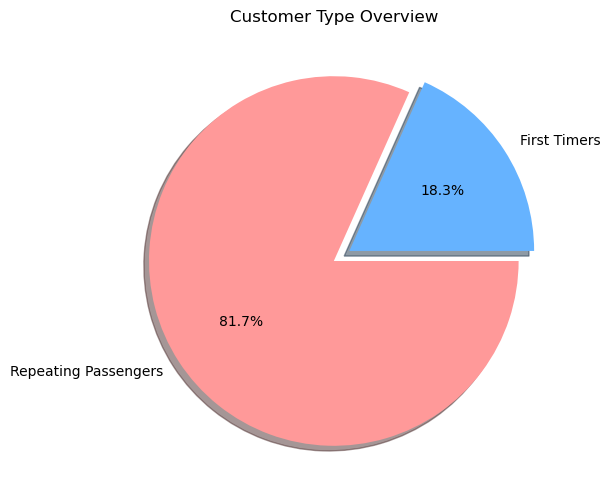

In [11]:
# Pie chart for Customer Type of the overall dataset
labels = ['First Timers', 'Repeating Passengers']
sizes = [first_timers_percentage, repeating_percentage]
colors = ['#66b3ff', '#ff9999'] 
explode = (0.1, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Customer Type Overview')
plt.show()

In [12]:
# What percentage of the passengers are in Business, Economy, or Economy Plus classes
business_class = airline_data[airline_data['Class'] == 'Business']
business_count = len(business_class)
business_percentage = (business_count / total_passengers) * 100 
business_percentage

47.85956267323683

In [13]:
# Economy class
economy_class = airline_data[airline_data['Class'] == 'Economy'] 
economy_count = len(economy_class)
economy_percentage = (economy_count / total_passengers) * 100
economy_percentage

44.894518016630734

In [14]:
#Economy plus class
economy_plus = airline_data[airline_data['Class'] == 'Economy Plus']
economy_plus_count = len(economy_plus)
economy_plus_percentage = (economy_plus_count / total_passengers) * 100
economy_plus_percentage

7.24591931013243

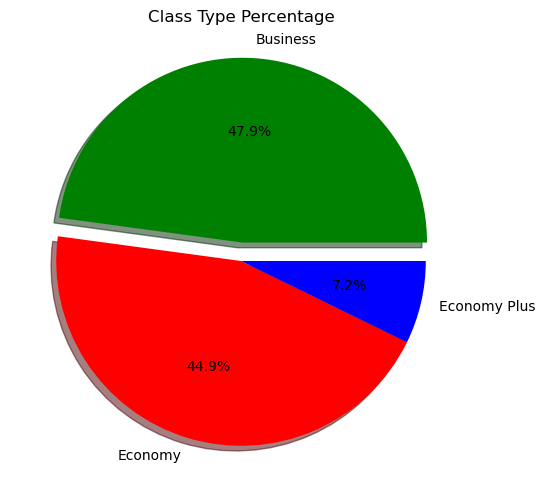

In [15]:
# Pie chart for Class of Seats of the overall dataset
labels = ['Business', 'Economy', 'Economy Plus']
sizes = [business_percentage, economy_percentage, economy_plus_percentage]
colors = ['green', 'red', 'blue'] 
explode = (0.1, 0, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Class Type Percentage')
plt.show()

In [16]:
# What is the distribution in flight data
#max flight data
flight_distance_max = airline_data['Flight Distance'].max()
flight_distance_max

4983

In [17]:
#min Flight data
flight_distance_min = airline_data['Flight Distance'].min()
flight_distance_min

31

In [18]:
# Creating bins for increments of 500 in the Flight data
bins = range(0, 5000, 500)

flight_distance_bins = pd.cut(airline_data['Flight Distance'], bins=bins, right=False)
flight_distance_counts = flight_distance_bins.value_counts().sort_index()
print(flight_distance_counts)

Flight Distance
[0, 500)        40072
[500, 1000)     35017
[1000, 1500)    15392
[1500, 2000)    12518
[2000, 2500)     9522
[2500, 3000)     7032
[3000, 3500)     5090
[3500, 4000)     5147
[4000, 4500)       35
Name: count, dtype: int64


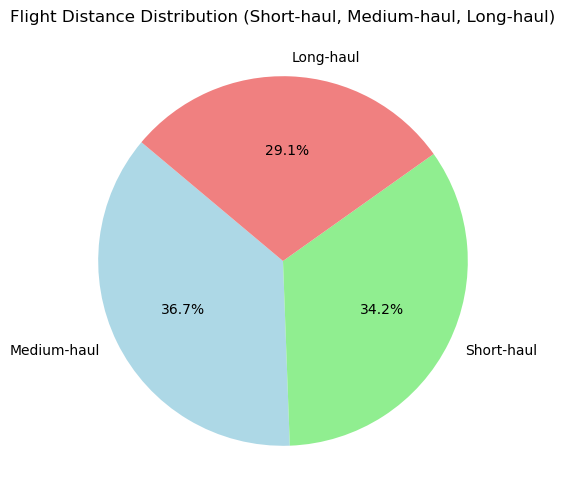

In [24]:
# Categorize flights based on distance
airline_data['Flight Type'] = pd.cut(
    airline_data['Flight Distance'],
    bins=[0, 549, 1550, float('inf')],
    labels=['Short-haul', 'Medium-haul', 'Long-haul']
)

# Count the number of each flight type
flight_type_counts = airline_data['Flight Type'].value_counts(normalize=True) * 100

# Plot the flight type distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Flight Distance Distribution (Short-haul, Medium-haul, Long-haul)')
plt.show()

In [25]:
# Define the service satisfaction columns
service_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 
    'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 
    'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]

# Calculate average satisfaction scores for each flight type
satisfaction_by_flight_type = airline_data.groupby('Flight Type')[service_columns].mean()

# Display the satisfaction DataFrame
print(satisfaction_by_flight_type)

             Departure and Arrival Time Convenience  Ease of Online Booking  \
Flight Type                                                                   
Short-haul                                 3.016122                2.665033   
Medium-haul                                3.148096                2.742872   
Long-haul                                  2.992184                2.882783   

             Check-in Service  Online Boarding  Gate Location  \
Flight Type                                                     
Short-haul           3.214625         3.032312       2.982529   
Medium-haul          3.282660         3.116018       2.960348   
Long-haul            3.444068         3.684781       2.991256   

             On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
Flight Type                                                                  
Short-haul           3.272975      3.288445          3.223169     3.190003   
Medium-haul          3.312221      3.326193 

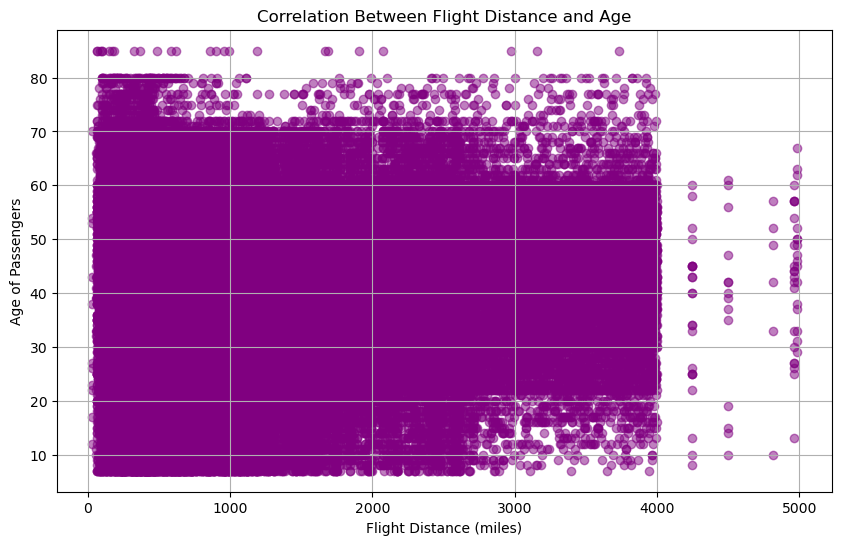

In [26]:
# Plot a scatter plot for flight distance vs. age
plt.figure(figsize=(10, 6))
plt.scatter(airline_data['Flight Distance'], airline_data['Age'], alpha=0.5, color='purple')
plt.title('Correlation Between Flight Distance and Age')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Age of Passengers')
plt.grid(True)
plt.show()

Top 5 Services by Satisfaction:
In-flight Service          3.642193
Baggage Handling           3.632114
Seat Comfort               3.441361
On-board Service           3.383023
In-flight Entertainment    3.358077
dtype: float64

Bottom 5 Services by Satisfaction:
Food and Drink                            3.204774
Departure and Arrival Time Convenience    3.057599
Gate Location                             2.976925
Ease of Online Booking                    2.756876
In-flight Wifi Service                    2.728696
dtype: float64


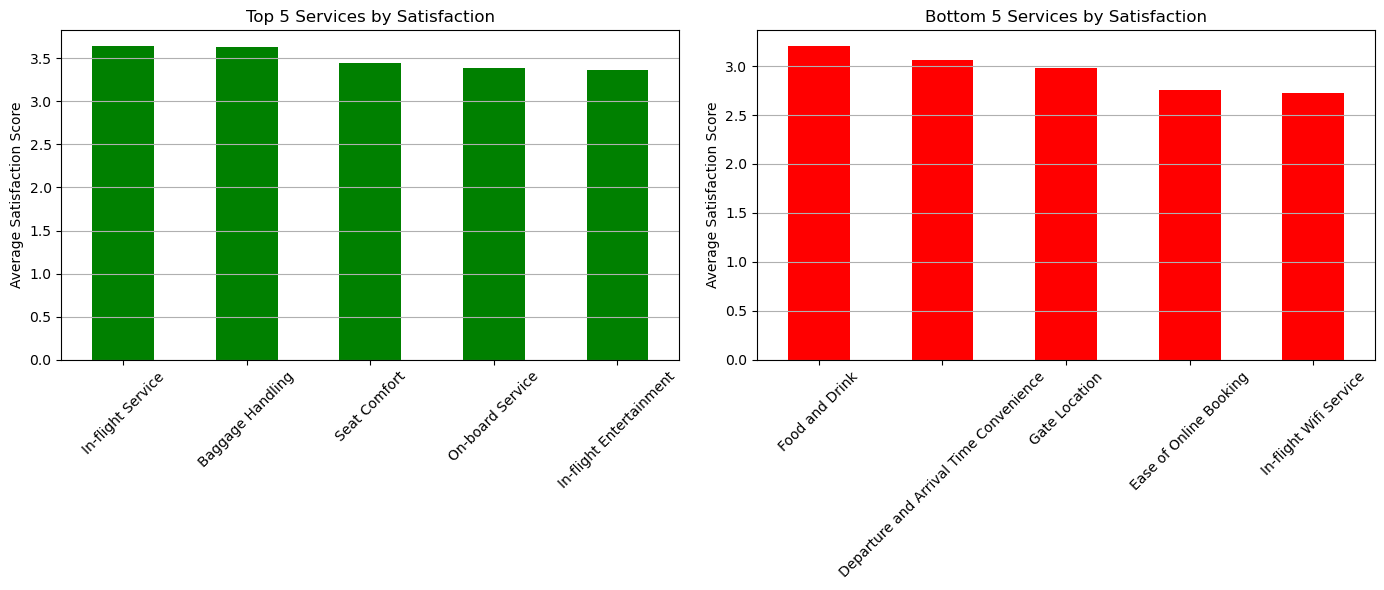

In [ ]:
# What are the Top 5 rated services
#What are the 5 least liked services

# Calculate average satisfaction ratings across all flights for each service column
average_satisfaction = airline_data[service_columns].mean()

# Sort the average satisfaction ratings in descending order to find top and bottom services
sorted_satisfaction = average_satisfaction.sort_values(ascending=False)

# Get the top 5 and bottom 5 services
top_5_services = sorted_satisfaction.head(5)
bottom_5_services = sorted_satisfaction.tail(5)

# Display the results
print("Top 5 Services by Satisfaction:")
print(top_5_services)

print("\nBottom 5 Services by Satisfaction:")
print(bottom_5_services)

# Plotting the top 5 and bottom 5 satisfaction ratings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_5_services.plot(kind='bar', color='green', title='Top 5 Services by Satisfaction')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation = 45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
bottom_5_services.plot(kind='bar', color='red', title='Bottom 5 Services by Satisfaction')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation = 45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [20]:
#Basic Statistics for AGE, Flight Distance, Departure Delay, and Arrival Delay
columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Create a DataFrame to store the statistics
statistics_df = pd.DataFrame(columns=['Mean', 'Median', 'Mode'], index=columns)

# Calculate and populate the statistics for each column
for col in columns:
    mean = airline_data[col].mean()
    median = airline_data[col].median()
    mode = airline_data[col].mode().iloc[0] if not airline_data[col].mode().empty else None
    
    statistics_df.loc[col] = [mean, median, mode]

# Display the statistics DataFrame
print(statistics_df)

                        Mean Median Mode
Age                39.427957   40.0   39
Flight Distance  1190.316392  844.0  337
Departure Delay    14.713713    0.0    0
Arrival Delay      15.091129    0.0  0.0


In [22]:
# Based on class is there a change in satisfaction?

In [23]:
# Do delays cause an increase in dissatisfaction?
